In [3]:
from tensorflow.keras.datasets import mnist 
import numpy as np
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)


2023-03-09 19:07:36.122964: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
from tensorflow import keras
from tensorflow.keras import layers
def get_model():
    model = keras.Sequential([
               layers.Dense(512, activation="relu"),
               layers.Dense(10, activation="softmax")
            ])
    model.compile(optimizer="rmsprop",
                          loss="sparse_categorical_crossentropy",
                          metrics=["accuracy"])
    return model
model = get_model()
history_noise = model.fit(
            train_images_with_noise_channels, train_labels,
            epochs=10,
            batch_size=128,
            validation_split=0.2)
model = get_model()
history_zeros = model.fit(
            train_images_with_zeros_channels, train_labels,
            epochs=10,
            batch_size=128,
            validation_split=0.2)


2023-03-09 19:08:55.826250: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.6310 - accuracy: 0.8101 - val_loss: 0.2987 - val_accuracy: 0.9038
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2565 - accuracy: 0.9211 - val_loss: 0.2088 - val_accuracy: 0.9356
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1655 - accuracy: 0.9489 - val_loss: 0.1959 - val_accuracy: 0.9429
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1174 - accuracy: 0.9631 - val_loss: 0.1511 - val_accuracy: 0.9552
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0880 - accuracy: 0.9719 - val_loss: 0.1198 - val_accuracy: 0.9654
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0646 - accuracy: 0.9796 - val_loss: 0.1560 - val_accuracy: 0.9553
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0477 - accuracy: 0.9851 - val_loss: 0.1434 - val_accuracy: 0.9608
Epoch 

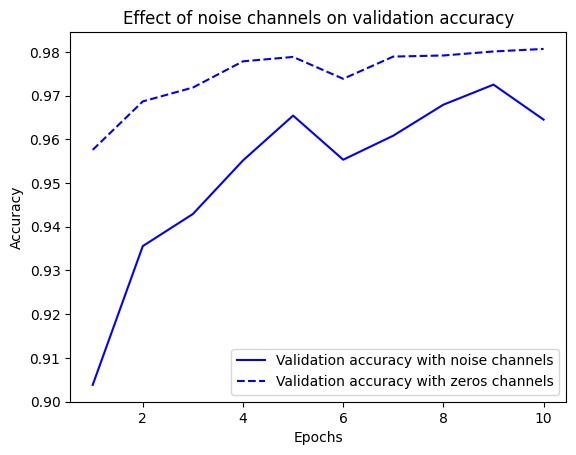

In [49]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"] 
val_acc_zeros = history_zeros.history["val_accuracy"] 
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
                label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
                 label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


In [15]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)


Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3182 - accuracy: 0.1022 - val_loss: 2.3055 - val_accuracy: 0.1069
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2996 - accuracy: 0.1162 - val_loss: 2.3134 - val_accuracy: 0.1018
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2907 - accuracy: 0.1280 - val_loss: 2.3169 - val_accuracy: 0.1008
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2777 - accuracy: 0.1384 - val_loss: 2.3272 - val_accuracy: 0.1001
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2618 - accuracy: 0.1509 - val_loss: 2.3356 - val_accuracy: 0.1004
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2400 - accuracy: 0.1681 - val_loss: 2.3461 - val_accuracy: 0.1020
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2159 - accuracy: 0.1824 - val_loss: 2.3581 - val_accuracy: 0.1043

Epoch 58/100
375/375 [==============================] - 1s 4ms/step - loss: 0.9814 - accuracy: 0.6728 - val_loss: 4.5465 - val_accuracy: 0.1008
Epoch 59/100
375/375 [==============================] - 1s 4ms/step - loss: 0.9654 - accuracy: 0.6802 - val_loss: 4.6115 - val_accuracy: 0.1020
Epoch 60/100
375/375 [==============================] - 1s 4ms/step - loss: 0.9528 - accuracy: 0.6824 - val_loss: 4.6441 - val_accuracy: 0.1030
Epoch 61/100
375/375 [==============================] - 1s 4ms/step - loss: 0.9383 - accuracy: 0.6886 - val_loss: 4.6803 - val_accuracy: 0.1028
Epoch 62/100
375/375 [==============================] - 1s 4ms/step - loss: 0.9257 - accuracy: 0.6914 - val_loss: 4.7386 - val_accuracy: 0.1053
Epoch 63/100
375/375 [==============================] - 1s 4ms/step - loss: 0.9133 - accuracy: 0.6953 - val_loss: 4.8033 - val_accuracy: 0.1050
Epoch 64/100
375/375 [==============================] - 1s 4ms/step - loss: 0.8979 - accuracy: 0.7039 - val_loss: 4.8805 - val_accuracy:

In [17]:
k=3
num_validation_samples = len(data) // k 
np.random.shuffle(data) 
validation_scores = []
for fold in range(k):
    validation_data = data[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
training_data = np.concatenate(
    data[:num_validation_samples * fold],
    data[num_validation_samples * (fold + 1):])
model = get_model()
model.fit(training_data, ...)
validation_score = model.evaluate(validation_data, ...)
validation_scores.append(validation_score)
validation_score = np.average(validation_scores)
model = get_model()
model.fit(data, ...)
test_score = model.evaluate(test_data, ...)

NameError: name 'data' is not defined

In [45]:
arr=[1,3,4]
val=arr[1:2]
print(arr[:1])
print(arr[2:])
print(val)


[1]
[4]
[3]


In [51]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
overfit = model.fit(train_images, train_labels,
epochs=10,
                 batch_size=128,
                 validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 715.1583 - accuracy: 0.4427 - val_loss: 23.7104 - val_accuracy: 0.2952
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 6.0565 - accuracy: 0.2637 - val_loss: 4.2408 - val_accuracy: 0.3697
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 3.0266 - accuracy: 0.2714 - val_loss: 2.2095 - val_accuracy: 0.2670
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 3.2023 - accuracy: 0.2602 - val_loss: 2.1479 - val_accuracy: 0.2633
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 3.0766 - accuracy: 0.2638 - val_loss: 2.3390 - val_accuracy: 0.2698
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.8231 - accuracy: 0.3000 - val_loss: 2.2318 - val_accuracy: 0.2579
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 2.7423 - accuracy: 0.2645 - val_loss: 2.4699 - val_accuracy: 0.3063
Epo

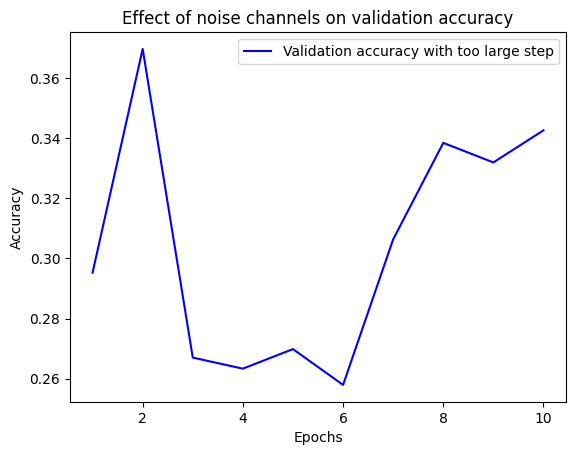

In [53]:
import matplotlib.pyplot as plt
val_acc_noise =overfit.history["val_accuracy"] 
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
                label="Validation accuracy with too large step")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
model = keras.Sequential([
            layers.Dense(512, activation="relu"),
            layers.Dense(10, activation="softmax")
        ])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
                     loss="sparse_categorical_crossentropy",
                     metrics=["accuracy"])
model.fit(train_images, train_labels,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.3889 - accuracy: 0.9097 - val_loss: 0.1459 - val_accuracy: 0.9611
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1426 - accuracy: 0.9636 - val_loss: 0.1490 - val_accuracy: 0.9649
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1202 - accuracy: 0.9724 - val_loss: 0.1751 - val_accuracy: 0.9666
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0980 - accuracy: 0.9782 - val_loss: 0.2127 - val_accuracy: 0.9691
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0898 - accuracy: 0.9812 - val_loss: 0.2071 - val_accuracy: 0.9693
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0808 - accuracy: 0.9838 - val_loss: 0.2516 - val_accuracy: 0.9677
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0760 - accuracy: 0.9857 - val_loss: 0.3585 - val_accuracy: 0.9653
Epoch 